# Setting up 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle


# EDA

In [3]:
train_df = pd.read_csv('data/train.csv')

train_df.tail()


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207,24.563878
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238,13.861690
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409,38.633704
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682,13.687309
89999,244,335,337,152,386,202,7.681146,0.613207,1,26,...,11.069077,6.303448,14.031393,1.877340,13.361607,2.164695,11.255181,3.404303,9.587379,59.613207


In [10]:
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


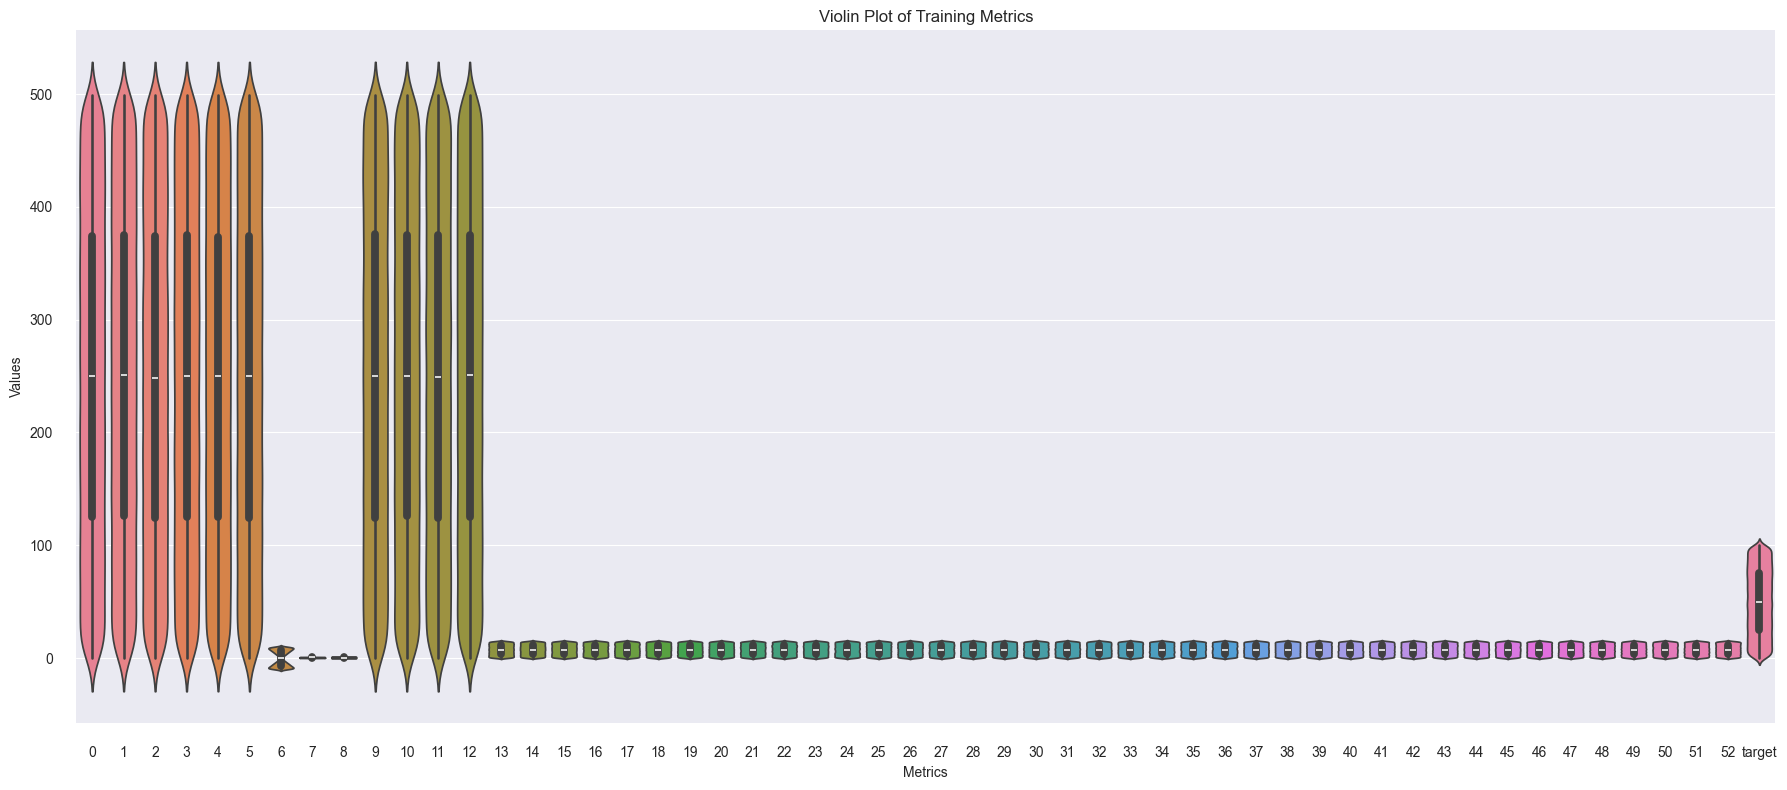

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(18, 8))
sns.violinplot(data = train_df)
sns.despine(offset=10, trim=True);
plt.title('Violin Plot of Training Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


# Scaller 

In [7]:
scaler = MinMaxScaler() 


In [8]:
target = train_df.pop('target')

target.describe()


count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

In [9]:
scaler.fit(train_df)
scaled_array = scaler.transform(train_df)
scaled_df = pd.DataFrame(scaled_array, columns = train_df.columns)

scaled_df.tail()


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
89995,0.657315,0.088176,0.641283,0.729459,0.014028,0.146293,0.746183,0.563879,1.0,0.631263,...,0.350152,0.017756,0.412404,0.514460,0.676333,0.114089,0.256648,0.826795,0.946409,0.158076
89996,0.434870,0.945892,0.348697,0.655311,0.511022,0.779559,0.318814,0.861699,0.0,0.288577,...,0.982488,0.343139,0.280651,0.965535,0.091667,0.425740,0.673842,0.842528,0.438435,0.457552
89997,0.378758,0.813627,0.426854,0.114228,0.989980,0.380762,0.809773,0.633707,1.0,0.442886,...,0.486438,0.993527,0.192440,0.578884,0.301496,0.103740,0.731416,0.519478,0.561528,0.202757
89998,0.837675,0.957916,0.326653,0.070140,0.781563,0.154309,0.318814,0.687313,0.0,0.579158,...,0.929612,0.849541,0.168377,0.736687,0.439342,0.841483,0.706459,0.043162,0.583112,0.083106
89999,0.488978,0.671343,0.675351,0.304609,0.773547,0.404810,0.885992,0.613210,1.0,0.052104,...,0.079269,0.737943,0.420242,0.935442,0.125155,0.890779,0.144313,0.750345,0.226956,0.639165


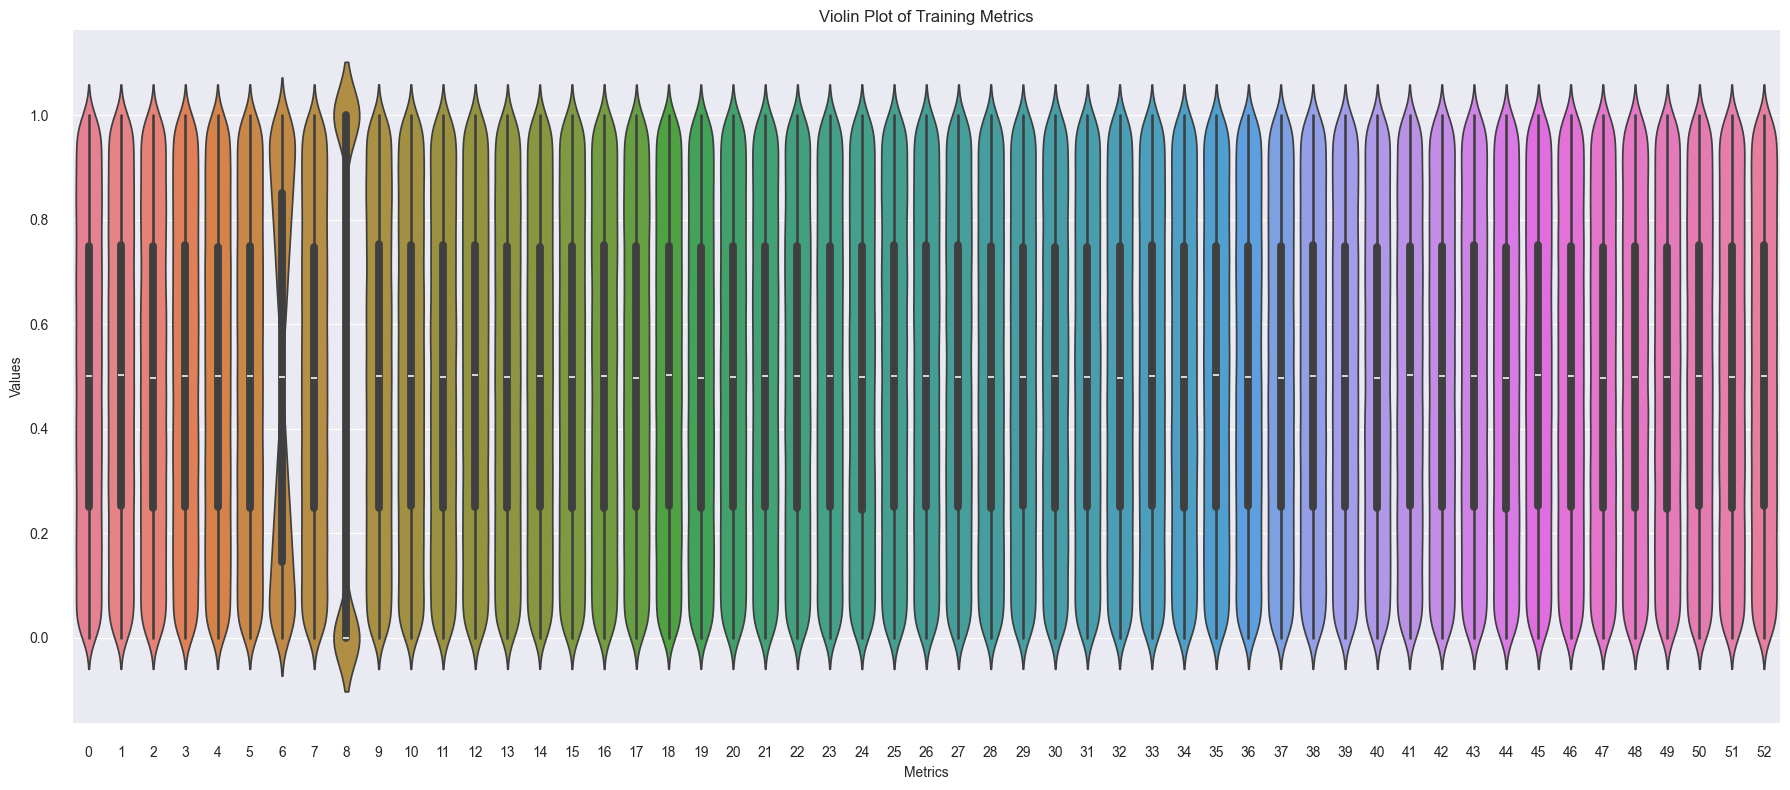

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(18, 8))
sns.violinplot(data = scaled_df)
sns.despine(offset=10, trim=True);
plt.title('Violin Plot of Training Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


In [10]:
with open('results/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('results/scaler.pkl', 'rb') as f:
    scaler_uploaded = pickle.load(f)


# Regression algorithms

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-10-19 15:41:28.025070: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(72000, 53) (18000, 53)
(72000,) (18000,)


## Linear regression 

In [12]:
model_linear = LinearRegression()


In [13]:
model_linear.fit(X_train, y_train)


LinearRegression()

In [14]:
y_pred = model_linear.predict(X_test)


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 841.8941852410935
R-squared: -0.0010641657143131145


## XGBoost

In [17]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, n_estimators=100, max_depth=3)


In [18]:
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred = model_xgb.predict(X_test)


In [20]:
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)


Mean Squared Error: 0.17285641366393623
R-squared: 0.9997944630518106


## Keras

In [21]:
model_keras = Sequential()
model_keras.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  
model_keras.add(Dense(units=32, activation='relu'))  
model_keras.add(Dense(units=1, activation='linear'))  


/Users/dkulish/Projects/DS_Engineer/ds_eng/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model_keras.compile(optimizer='adam', loss='mean_squared_error')


In [23]:
model_keras.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 2s 658us/step - loss: 1054.7690
Epoch 2/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 109.6458
Epoch 3/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - loss: 12.5978
Epoch 4/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 2.6213
Epoch 5/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 1.3575
Epoch 6/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - loss: 0.7957
Epoch 7/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - loss: 0.6926
Epoch 8/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 0.4693
Epoch 9/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 0.3979
Epoch 10/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 0.3770
Epoch 11/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.3340
Epoch 12/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - loss: 0.3330
Epoch 13/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 2s 671us/step - loss: 0.2822
Epoch 14/100
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/s

In [24]:
loss = model_keras.evaluate(X_test, y_test)
print('Test loss:', loss)


563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.0811
Test loss: 0.08013463020324707


In [25]:
predictions = model_keras.predict(X_test)


563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step


In [28]:
mse_keras = mean_squared_error(y_test, predictions)
r2_keras = r2_score(y_test, predictions)

print("Mean Squared Error:", mse_keras)
print("R-squared:", r2_keras)


Mean Squared Error: 0.08013462070295448
R-squared: 0.9999047149883855


# Conslusion

In [38]:
data = {
    'Model': ['Keras', 'XGBoost', 'Linear Regression'],
    'MSE': [mse_keras, mse_xgb, mse],
    'R2': [r2_keras, r2_xgb, r2]
}
df = pd.DataFrame(data)
df['MSE'] = df['MSE'].map('{:.2f}'.format)
df['R2'] = df['R2'].map('{:.2f}%'.format)  # Keep the percentage sign for R2
df.style.set_properties(**{'text-align': 'center'})

print(df)


               Model     MSE      R2
0              Keras    0.08   1.00%
1            XGBoost    0.17   1.00%
2  Linear Regression  841.89  -0.00%
